# Covariance Matrix Function

- (n,d) 데이터의 공분산 구하기 
- memo : 공분산은 단위 통일을 하지 않으면, numeric 에서 바로 의미를 추론해내기 힘들다. => 관계파악을 위해서는 corrleation 으로 conversion 이 필요 

In [25]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

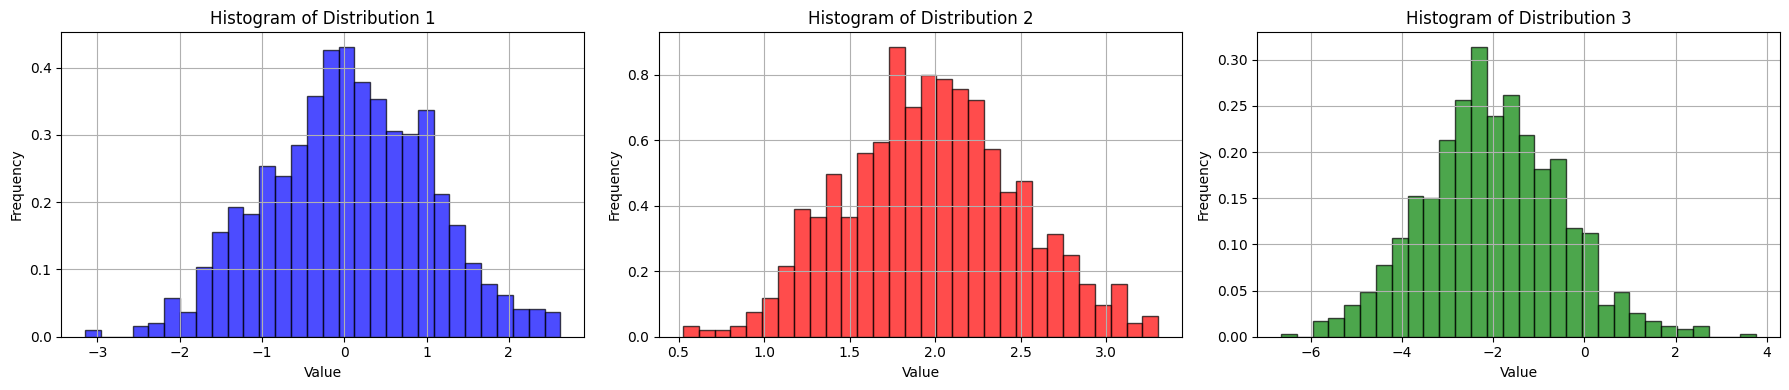

In [27]:
# Parameters for the Gaussian distributions
means = [0, 2, -2]
std_devs = [1, 0.5, 1.5]
sizes = [1000, 1000, 1000]
colors = ['blue', 'red', 'green']
labels = ['Distribution 1', 'Distribution 2', 'Distribution 3']

# Create subplots for each histogram
fig, axs = plt.subplots(1, 3, figsize=(18, 4))

# Generate data for each Gaussian distribution and plot histogram
for i in range(3):
    data = np.random.normal(means[i], std_devs[i], sizes[i])
    axs[i].hist(data, bins=30, density=True, alpha=0.7, color=colors[i], edgecolor='black')
    axs[i].set_title(f'Histogram of {labels[i]}')
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')
    axs[i].grid(True)

plt.tight_layout()
plt.show()


In [46]:
# how to get the covariance matrix ? 
d_1 = np.random.normal(means[0], std_devs[0], sizes[0])
d_2 = np.random.normal(means[1], std_devs[1], sizes[1])
d_3 = np.random.normal(means[2], std_devs[2], sizes[2])

# expand diemnsion 
d_1 = np.expand_dims(d_1, axis=1)
d_2 = np.expand_dims(d_2, axis=1)
d_3 = np.expand_dims(d_3, axis=1)

# concat feature wise 
d_c = np.concatenate( (d_1 ,d_2, d_3) , axis=-1)

In [47]:
# check dimension 
# (n, d) 
d_c.shape

(1000, 3)

In [65]:
# get each mean 
m_1 = np.mean( d_c[:,0])
m_2 = np.mean( d_c[:,1])
m_3 = np.mean( d_c[:,2])

# subtract each feature 
d_c[:,0] = d_c[:,0] - m_1
d_c[:,1] = d_c[:,1] - m_2
d_c[:,2] = d_c[:,2] - m_3

In [70]:
# get covariance matrix 
covariance_mat = 1/(d_c.shape[0]) * np.matmul( np.transpose(d_c) , d_c)

In [75]:
# check the output covariance_mat
covariance_mat

array([[ 1.01984727,  0.00239834, -0.07668276],
       [ 0.00239834,  0.25569904, -0.00396235],
       [-0.07668276, -0.00396235,  2.16341656]])

In [76]:
# 이전에 만들어놨던 각 dimension 표준편차들과 비교
[i*i for i in std_devs]

[1, 0.25, 2.25]